## Step 0: Import Libraries

In this section, we import the necessary libraries for data manipulation, visualization, and machine learning.

- `numpy`: A fundamental package for scientific computing with Python.
- `matplotlib.pyplot`: A plotting library for creating static, animated, and interactive visualizations in Python.
- `pandas`: A powerful data manipulation and analysis library for Python.
- `seaborn`: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
- `sklearn.datasets`: A module in scikit-learn that provides utilities to load datasets.
- `sklearn.model_selection.train_test_split`: A function to split the dataset into training and testing sets.
- `sklearn.linear_model.LogisticRegression`: A module to perform logistic regression.
- `sklearn.metrics.mean_squared_error`: A function to compute the mean squared error, a measure of the quality of an estimator.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import imblearn 


## Step 1: Plot Quality Distribution and print quanity of distributions

Visualize the distribution of wine quality for both red and white wines.

- `plt.figure(figsize=(10, 6))`: Create a new figure with a specified size.
- `sns.countplot(x='quality', hue='type', data=df, palette={'Red': 'red', 'White': 'grey'})`: Create a count plot to show the distribution of wine quality, with different colors for red and white wines.
- `plt.xlabel('Quality')`: Set the label for the x-axis.
- `plt.ylabel('Count')`: Set the label for the y-axis.
- `plt.title('Quality Distribution of Red and White Wines')`: Set the title of the plot.
- `plt.show()`: Display the plot.

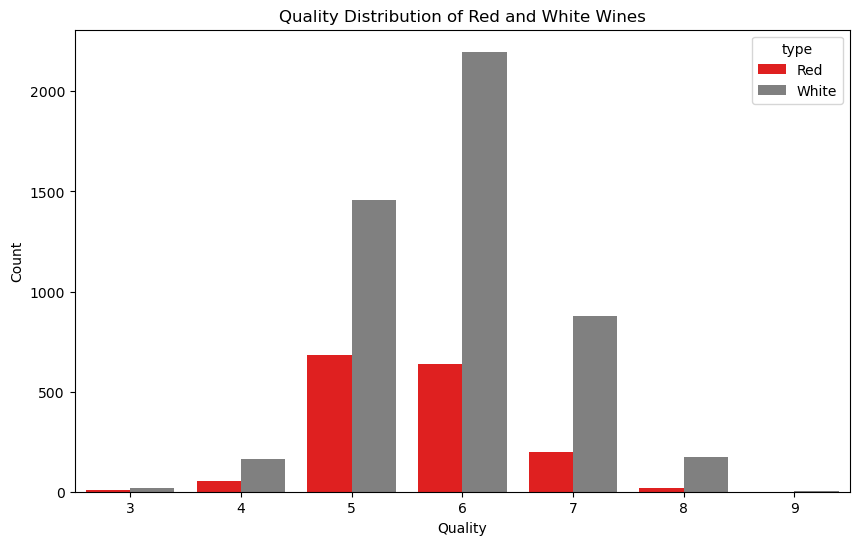

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [9]:
# Load the datasets
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to distinguish between red and white wine
df_red_wine['type'] = 'Red'
df_white_wine['type'] = 'White'

# Concatenate the dataframes
df = pd.concat([df_red_wine, df_white_wine])

# Plot the quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df, palette={'Red': 'red', 'White': 'grey'})
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Quality Distribution of Red and White Wines')
plt.show()

print(df_red_wine['quality'].value_counts())
print(df_white_wine['quality'].value_counts())

Based on what we inspected in the datasets we will continue with the white wine dataset


## Step 2: Split White Wine Dataset into Train and Test Sets

In this section, we split the white wine dataset into training and testing sets.

In [10]:
from sklearn.model_selection import train_test_split

# Define the features and target
X = df_white_wine.drop(['quality', 'type'], axis=1)
y = df_white_wine['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

## Step 3: Perform Scaling on the Data

In this section, we will perform scaling on the white wine dataset after splitting it into training and testing sets.

- `train_test_split`: A function to split the dataset into training and testing sets.
- `StandardScaler()`: Initialize the scaler to standardize features by removing the mean and scaling to unit variance.
- `scaler.fit_transform(X_train)`: Fit the scaler on the training data and transform it.
- `scaler.transform(X_test)`: Transform the testing data using the fitted scaler.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## Step 4: Classifier Evaluation

In this section, we will evaluate the performance of four classifiers: Logistic Regression, Decision Trees, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN) using Repeated k-Fold Cross-Validation.

- `RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=42)`: Initialize the cross-validation strategy.
- `cross_validate`: Perform cross-validation and evaluate the classifiers using metrics such as accuracy, precision, recall, and F1-score.
- `LogisticRegression()`: Initialize the Logistic Regression classifier.
- `DecisionTreeClassifier()`: Initialize the Decision Tree classifier.
- `SVC()`: Initialize the Support Vector Machine classifier.
- `KNeighborsClassifier()`: Initialize the K-Nearest Neighbors classifier.
- `np.mean(scores['test_accuracy'])`: Calculate the mean accuracy score.
- `np.std(scores['test_accuracy'])`: Calculate the standard deviation of the accuracy score.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
import numpy as np

# Initialize the classifiers
classifiers = {
    'liner regression': LogisticRegression(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=10, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    scores = cross_validate(clf, X_train_scaled, y_train, cv=cv, scoring=scoring)
    results[name] = {
        'accuracy_mean': np.mean(scores['test_accuracy']),
        'accuracy_std': np.std(scores['test_accuracy']),
        'precision_mean': np.mean(scores['test_precision']),
        'precision_std': np.std(scores['test_precision']),
        'recall_mean': np.mean(scores['test_recall']),
        'recall_std': np.std(scores['test_recall']),
        'f1_mean': np.mean(scores['test_f1']),
        'f1_std': np.std(scores['test_f1'])
    }

c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


In [18]:
# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['accuracy_mean']:.4f} ± {metrics['accuracy_std']:.4f}")
    print(f"  Precision: {metrics['precision_mean']:.4f} ± {metrics['precision_std']:.4f}")
    print(f"  Recall: {metrics['recall_mean']:.4f} ± {metrics['recall_std']:.4f}")
    print(f"  F1 Score: {metrics['f1_mean']:.4f} ± {metrics['f1_std']:.4f}")
    print()

# Identify the best classifier based on the chosen metric (e.g., F1 Score)
best_classifier = max(results, key=lambda name: results[name]['f1_mean'])
print(f"The best classifier based on F1 Score is: {best_classifier}")

liner regression:
  Accuracy: 0.5372 ± 0.0102
  Precision: 0.5062 ± 0.0152
  Recall: 0.5372 ± 0.0102
  F1 Score: 0.5020 ± 0.0104

Logistic Regression:
  Accuracy: 0.5372 ± 0.0102
  Precision: 0.5062 ± 0.0152
  Recall: 0.5372 ± 0.0102
  F1 Score: 0.5020 ± 0.0104

Decision Tree:
  Accuracy: 0.5436 ± 0.0140
  Precision: 0.5443 ± 0.0141
  Recall: 0.5436 ± 0.0140
  F1 Score: 0.5434 ± 0.0139

Random Forest:
  Accuracy: 0.6320 ± 0.0122
  Precision: 0.6423 ± 0.0129
  Recall: 0.6320 ± 0.0122
  F1 Score: 0.6167 ± 0.0125

Support Vector Machine:
  Accuracy: 0.5627 ± 0.0083
  Precision: 0.5324 ± 0.0146
  Recall: 0.5627 ± 0.0083
  F1 Score: 0.5264 ± 0.0086

K-Nearest Neighbors:
  Accuracy: 0.5324 ± 0.0124
  Precision: 0.5156 ± 0.0131
  Recall: 0.5324 ± 0.0124
  F1 Score: 0.5190 ± 0.0119

The best classifier based on F1 Score is: Random Forest


## Step 5: Train the Final Model

In this section, we train the final model using the best-performing classifier identified in the previous step.

- `classifiers[best_classifier]`: Retrieve the best classifier from the dictionary of classifiers.
- `clf.fit(X_train_scaled, y_train)`: Train the best classifier on the entire training set.

This step ensures that the final model is trained on the full training dataset to maximize its performance.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the best classifier
clf = classifiers[best_classifier]

# Train the best classifier on the entire training set
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

## Step 6: Report the Model's Performance on the Test Set

In this section, we report the performance of the final model on the test set using the best-performing classifier identified in the previous step.

- `accuracy_score(y_test, y_pred)`: Calculate the accuracy of the final model.
- `precision_score(y_test, y_pred, average='weighted')`: Calculate the precision of the final model.
- `recall_score(y_test, y_pred, average='weighted')`: Calculate the recall of the final model.
- `f1_score(y_test, y_pred, average='weighted')`: Calculate the F1 score of the final model.

The final model's performance metrics are as follows:

- **Accuracy**: Measures the proportion of correctly classified instances.
- **Precision**: Measures the proportion of true positive instances among the instances classified as positive.
- **Recall**: Measures the proportion of true positive instances among the actual positive instances.
- **F1 Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns.

The best classifier based on F1 Score is used to build the final model, and its performance on the test set is reported below.

In [21]:
# Predict the labels for the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred)
final_precision = precision_score(y_test, y_pred, average='weighted')
final_recall = recall_score(y_test, y_pred, average='weighted')
final_f1 = f1_score(y_test, y_pred, average='weighted')

# Print the final model performance
print(f"Final Model Performance ({best_classifier}):")
print(f"  Accuracy: {final_accuracy:.4f}")
print(f"  Precision: {final_precision:.4f}")
print(f"  Recall: {final_recall:.4f}")
print(f"  F1 Score: {final_f1:.4f}")

Final Model Performance (Random Forest):
  Accuracy: 0.6721
  Precision: 0.6695
  Recall: 0.6721
  F1 Score: 0.6623


c:\Users\tyhug\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
